# Pretrained CNNs in PyTorch

Welcome to the `08_pretrained_cnns` notebook. This bit of code focus on utilizing pretrained convolutional neural networks (CNNs). 

Pretrained models, which have been trained on large datasets like ImageNet, offer a starting point for various image recognition tasks. The notebook explores topics such as loading and exploring pretrained models, preparing and preprocessing datasets, performing inference, and comparing different models. It also covers visualization techniques for model predictions and learned features.

## Table of contents

1. [Understanding pretrained CNNs](#understanding-pretrained-cnns)
2. [Setting up the environment](#setting-up-the-environment)
3. [Loading and exploring pretrained models](#loading-and-exploring-pretrained-models)
4. [Preparing and preprocessing the dataset](#preparing-and-preprocessing-the-dataset)
5. [Performing inference with pretrained models](#performing-inference-with-pretrained-models)
6. [Comparing different pretrained models](#comparing-different-pretrained-models)
7. [Visualizing model predictions and features](#visualizing-model-predictions-and-features)

## Understanding pretrained CNNs

Pretrained CNNs leverage models that have already been trained on large-scale datasets, such as ImageNet, for tasks like image classification. These pretrained models allow for faster deployment and often provide better results, especially when the available data is limited. 

Pretrained CNNs are widely used in transfer learning, where the knowledge learned from one task (e.g., classifying objects in ImageNet) is applied to another, often related, task (e.g., classifying different types of medical images).

### **Why use pretrained CNNs?**

There are several reasons to use pretrained CNNs:

- **Avoiding long training times**: Training deep CNNs from scratch is computationally expensive and can take days or even weeks. Pretrained models have already been trained on vast datasets, saving time.
- **Better performance on small datasets**: When a dataset is small, training a CNN from scratch can lead to overfitting, as the model may not generalize well. A pretrained CNN, having learned general visual features from a large dataset, can apply this knowledge to new tasks, often with better generalization.
- **Effective feature extraction**: CNNs trained on large datasets such as ImageNet can learn to extract powerful features that are useful for a wide range of tasks, even when transferred to new datasets or domains.

### **Key concepts in pretrained CNNs**

#### **Transfer learning**

Transfer learning is the main concept behind using pretrained CNNs. In essence, transfer learning involves using a model trained on one task and applying it to a different but related task. 

There are two common approaches to transfer learning with CNNs:

- **Feature extraction**: In this approach, the convolutional layers of the pretrained CNN are used as fixed feature extractors. These layers are not fine-tuned during training; instead, the pretrained filters are used to extract features from the new dataset, and a new fully connected classifier is trained on top of these features.
- **Fine-tuning**: In this approach, the pretrained CNN is not only used as a feature extractor but is also fine-tuned on the new dataset. The entire network, or part of it, is retrained to adapt the learned features to the new task.

#### **Feature extraction vs fine-tuning**

When deciding between feature extraction and fine-tuning, some factors come into play:

- **Feature extraction** is faster since only the classifier is trained, and the pretrained convolutional layers remain unchanged. This is particularly useful when the target dataset is small or when computational resources are limited.
- **Fine-tuning**, on the other hand, allows the model to adjust the pretrained filters to the specific characteristics of the new dataset, often leading to better performance. However, it requires more computational power and can be prone to overfitting if the target dataset is small.

In both cases, the early layers of a pretrained CNN are typically retained as they capture low-level, generic features like edges and textures, which are useful for a wide range of tasks. The later layers, which learn more task-specific features, are either replaced or fine-tuned depending on the method used.

### **Popular pretrained CNN architectures**

Several CNN architectures have been widely adopted for transfer learning due to their effectiveness and availability as pretrained models:

- **AlexNet**: One of the earliest successful CNNs, AlexNet consists of five convolutional layers followed by three fully connected layers. It was trained on ImageNet and sparked the popularity of deep CNNs.
- **VGG**: VGG networks are known for their simplicity and uniformity. They consist of small filters (3x3) and deep architectures, which capture fine details in images.
- **ResNet**: Residual Networks (ResNet) introduced the idea of residual connections, which help prevent the vanishing gradient problem in deep networks. ResNet models are highly popular for transfer learning due to their excellent performance across a variety of tasks.
- **Inception (GoogLeNet)**: Inception networks utilize "Inception modules," which apply multiple convolutional filters of different sizes in parallel. This architecture allows the model to capture features at various scales, making it highly versatile.
- **DenseNet**: DenseNet networks have dense connections between layers, where each layer receives input from all preceding layers. This architecture improves the flow of gradients during training and makes better use of features learned by earlier layers.

### **Transfer learning strategies**

There are different strategies to employ when working with pretrained CNNs, depending on the size of the dataset and the similarity between the source (pretraining) and target tasks:

- **Small dataset, similar task**: Use feature extraction. Freezing the convolutional layers and training only the classifier is usually sufficient.
- **Large dataset, similar task**: Fine-tuning is more appropriate, as the large amount of data can justify retraining part or all of the model.
- **Small dataset, dissimilar task**: Feature extraction with a fully connected classifier is the preferred approach to avoid overfitting.
- **Large dataset, dissimilar task**: Fine-tuning is beneficial since the large dataset can help the model learn new patterns and features specific to the task.

### **Advantages of pretrained CNNs**

Using pretrained CNNs has several advantages:

- **Faster convergence**: Since the model has already been trained on a large dataset, its weights are well-initialized, leading to faster convergence on new tasks.
- **Better generalization**: Pretrained models often generalize well to new tasks, especially when the tasks are related to the original pretraining task.
- **Resource efficiency**: Pretrained models reduce the computational resources needed, as they leverage the knowledge learned from previous tasks.

### **Limitations of pretrained CNNs**

Despite their advantages, pretrained CNNs also have some limitations:

- **Bias from pretraining data**: The features learned by the model are biased toward the dataset on which it was trained. For instance, models pretrained on ImageNet may not perform as well on tasks that differ significantly from image classification.
- **Domain adaptation**: When the target domain differs significantly from the source domain (e.g., medical images vs. natural images), the pretrained features might not be as useful. Fine-tuning may be required, but this can increase the risk of overfitting if the new dataset is small.

### **Maths**

#### **Transfer learning in CNNs**

In transfer learning, we leverage a pretrained model and adapt it to a new task. Mathematically, this involves taking the weights $ W $ learned during the pretraining phase (e.g., on ImageNet) and applying them to a new dataset. Once again, there are two main approaches:

##### **Feature extraction**

In feature extraction, the weights of the convolutional layers are frozen. These layers serve as fixed feature extractors, and only the final classification layer is retrained for the new task.

If we denote the weights of the convolutional layers as $ W_{\text{conv}} $ and the weights of the new fully connected layer as $ W_{\text{fc}} $, the forward pass during transfer learning is:

$$
Z_{\text{conv}} = f_{\text{conv}}(X; W_{\text{conv}})
$$

$$
Z_{\text{fc}} = f_{\text{fc}}(Z_{\text{conv}}; W_{\text{fc}})
$$

Here, $ X $ is the input, $ Z_{\text{conv}} $ represents the features extracted by the frozen convolutional layers, and $ Z_{\text{fc}} $ is the output from the new classifier. During training, only $ W_{\text{fc}} $ is updated, while $ W_{\text{conv}} $ remains fixed. Therefore, the gradients with respect to $ W_{\text{conv}} $ are zero:

$$
\frac{\partial L}{\partial W_{\text{conv}}} = 0
$$

where $ L $ is the loss function, and the only gradients computed are for the final classification layer:

$$
\frac{\partial L}{\partial W_{\text{fc}}} = \frac{\partial L}{\partial Z_{\text{fc}}} \cdot \frac{\partial Z_{\text{fc}}}{\partial W_{\text{fc}}}
$$

##### **Fine-tuning**

In fine-tuning, some or all of the layers of the pretrained model are unfrozen, allowing their weights to be adjusted during training. This involves recalculating gradients for both the pretrained layers and the new fully connected layer. The overall loss function $ L $ now depends on both $ W_{\text{conv}} $ and $ W_{\text{fc}} $:

$$
L = L(Y, \hat{Y}(X; W_{\text{conv}}, W_{\text{fc}}))
$$

The gradients for each layer are updated using backpropagation:

$$
\frac{\partial L}{\partial W_{\text{conv}}} = \frac{\partial L}{\partial Z_{\text{conv}}} \cdot \frac{\partial Z_{\text{conv}}}{\partial W_{\text{conv}}}
$$

$$
\frac{\partial L}{\partial W_{\text{fc}}} = \frac{\partial L}{\partial Z_{\text{fc}}} \cdot \frac{\partial Z_{\text{fc}}}{\partial W_{\text{fc}}}
$$

The main distinction between fine-tuning and feature extraction is that fine-tuning allows the model to learn new patterns by modifying pretrained weights, while feature extraction reuses the pretrained weights without modification.

#### **Weight initialization in transfer learning**

In a typical CNN trained from scratch, the weights $ W $ are initialized randomly (e.g., using Xavier or He initialization). In transfer learning, however, the pretrained weights $ W_{\text{pretrained}} $ are used as the starting point:

$$
W = W_{\text{pretrained}} + \Delta W
$$

This weight initialization brings two benefits:
- **Faster convergence**: Since $ W_{\text{pretrained}} $ is already a good approximation (having been trained on a large dataset), the gradients $ \Delta W $ required to adapt to the new task are much smaller, leading to faster convergence.
- **Better generalization**: Pretrained weights have already captured important low-level and mid-level features (such as edges, textures, and shapes), which often generalize well to new datasets.

#### **Pretrained CNN architectures**

Different CNN architectures handle the flow of information and the learning of features in unique ways. Here are the mathematical concepts behind some of the most popular architectures used in transfer learning:

##### **ResNet (Residual Networks)**

ResNet introduced the idea of **residual connections** or **skip connections**, which are defined as:

$$
y = f(x) + x
$$

Here, $ f(x) $ represents the transformation applied by a block of layers (such as convolutional layers), and $ x $ is the input to the block. This formulation allows the network to learn residuals rather than directly mapping inputs to outputs. The residual connections help mitigate the vanishing gradient problem by allowing gradients to flow directly through the skip connections during backpropagation:

$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} \cdot (1 + \frac{\partial f(x)}{\partial x})
$$

As a result, ResNet models can be much deeper without suffering from performance degradation, making them ideal for transfer learning on complex tasks.

##### **VGG**

VGG networks are known for their simplicity, with layers composed of small filters (3x3) applied consecutively. The convolution operation in VGG is mathematically expressed as:

$$
S(i,j) = \sum_{m=0}^{2} \sum_{n=0}^{2} W(m,n) \cdot X(i+m,j+n) + b
$$

This uniform architecture makes VGG networks deep but computationally expensive. In transfer learning, VGG’s deep layers are excellent for capturing fine-grained details, which can be transferred to new tasks. However, their depth also means they require more computational power to fine-tune compared to shallower networks such as AlexNet.

##### **DenseNet**

DenseNet introduces **dense connections**, where each layer receives input from all preceding layers. If we denote the input to the $ l $-th layer as $ x_l $, the output of the $ l $-th layer is computed as:

$$
x_l = H_l([x_0, x_1, \dots, x_{l-1}])
$$

where $ H_l $ represents the transformation applied by the layer, and $ [x_0, x_1, \dots, x_{l-1}] $ is the concatenation of the feature maps from all preceding layers. This results in a highly connected network, where information from earlier layers is directly passed to later layers. In transfer learning, DenseNet’s dense connections improve gradient flow and make the network more efficient at reusing learned features, which can be beneficial when fine-tuning on new tasks.

#### **Gradient flow in fine-tuning**

When fine-tuning a pretrained CNN, the behavior of the gradients is crucial to understanding how the model adapts to the new task. In a standard CNN, gradients can vanish or explode as they propagate through deep layers. However, in architectures such as ResNet or DenseNet, residual or dense connections help gradients flow more smoothly:

- In **ResNet**, residual connections allow gradients to bypass several layers, reducing the chance of vanishing gradients.
- In **DenseNet**, the direct connections between layers ensure that gradients flow freely between all layers, enhancing the model’s ability to fine-tune even on complex tasks.

In both cases, the smooth gradient flow results in more effective fine-tuning, as the pretrained weights can be adjusted more easily without encountering significant training challenges.

## Setting up the environment

##### **Q1: How do you install the necessary libraries for working with pretrained CNNs in PyTorch?**


In [1]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

##### **Q2: How do you import the required modules for loading and using pretrained models in PyTorch?**


In [2]:
import torch
import torchvision
from torchvision import models, transforms

##### **Q3: How do you set the device to GPU, if available, to work with PyTorch?**


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


##### **Q4: How do you check the current version of PyTorch installed in your environment?**

In [4]:
print(torch.__version__)

2.4.1


## Loading and exploring pretrained models

##### **Q5: How do you load a pretrained model from `torchvision` in PyTorch?**


In [5]:
import torchvision.models as models

resnet50 = models.resnet50(pretrained=True)

/home/fellmir/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/fellmir/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


##### **Q6: How do you inspect the architecture of a loaded pretrained model in PyTorch?**


In [6]:
print(resnet50)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

##### **Q7: How do you modify the input layer of a pretrained model to match the input dimensions of your dataset?**


In [7]:
from torch import nn

# If needed, to modify the first convolutional layer to take 1-channel input (e.g., for grayscale images):
# resnet50.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

##### **Q8: How do you extract and print out the names and shapes of all layers in a pretrained model using PyTorch?**


In [8]:
for name, layer in resnet50.named_modules():
    print(f"Layer: {name}, Type: {layer}")

Layer: , Type: ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 

In [9]:
# To see the shape of the weights:
for name, param in resnet50.named_parameters():
    print(f"Layer: {name} | Shape: {param.shape}")

Layer: conv1.weight | Shape: torch.Size([64, 3, 7, 7])
Layer: bn1.weight | Shape: torch.Size([64])
Layer: bn1.bias | Shape: torch.Size([64])
Layer: layer1.0.conv1.weight | Shape: torch.Size([64, 64, 1, 1])
Layer: layer1.0.bn1.weight | Shape: torch.Size([64])
Layer: layer1.0.bn1.bias | Shape: torch.Size([64])
Layer: layer1.0.conv2.weight | Shape: torch.Size([64, 64, 3, 3])
Layer: layer1.0.bn2.weight | Shape: torch.Size([64])
Layer: layer1.0.bn2.bias | Shape: torch.Size([64])
Layer: layer1.0.conv3.weight | Shape: torch.Size([256, 64, 1, 1])
Layer: layer1.0.bn3.weight | Shape: torch.Size([256])
Layer: layer1.0.bn3.bias | Shape: torch.Size([256])
Layer: layer1.0.downsample.0.weight | Shape: torch.Size([256, 64, 1, 1])
Layer: layer1.0.downsample.1.weight | Shape: torch.Size([256])
Layer: layer1.0.downsample.1.bias | Shape: torch.Size([256])
Layer: layer1.1.conv1.weight | Shape: torch.Size([64, 256, 1, 1])
Layer: layer1.1.bn1.weight | Shape: torch.Size([64])
Layer: layer1.1.bn1.bias | Shape:

##### **Q9: How do you load a pretrained model with its weights frozen, so they are not updated during training?**


In [10]:
# for param in resnet50.parameters():
#     param.requires_grad = False

##### **Q10: How do you replace the final fully connected layer of a pretrained model to fit the number of classes in your dataset?**

In [11]:
# num_classes = 10
# resnet50.fc = nn.Linear(resnet50.fc.in_features, num_classes)  # replacing the final fully connected layer with the number of classes in case

## Preparing and preprocessing the dataset

##### **Q11: How do you load and preprocess an image dataset using `torchvision.datasets`?**


In [12]:
from torchvision import datasets

transform = transforms.Compose([
    transforms.ToTensor()  # Converts images to PyTorch tensors
])

train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


##### **Q12: How do you apply normalization to an image dataset to match the input requirements of a pretrained model in PyTorch?**


In [13]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

transform = transforms.Compose([
    transforms.ToTensor(),
    normalize  # Apply ImageNet-specific normalization
])

train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


##### **Q13: How do you resize all images in your dataset to the required input size for a pretrained model in PyTorch?**


In [14]:
transform = transforms.Compose([
    transforms.Resize(256),  # Resize the shortest side to 256 pixels
    transforms.CenterCrop(224),  # Crop the center to get 224x224
    transforms.ToTensor(),
    normalize
])

train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


##### **Q14: How do you apply data augmentation techniques such as random horizontal flip and random crop to your training dataset in PyTorch?**

In [15]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomCrop(224),  # Randomly crop to 224x224
    transforms.ToTensor(),
    normalize
])

train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=train_transform)

Files already downloaded and verified


##### **Q15: How do you create DataLoaders for training and validation datasets in PyTorch?**


In [16]:
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    normalize
])

test_transform = transforms.Compose([
    transforms.Resize(256), 
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize
])

train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=train_transform)
test_dataset = datasets.CIFAR100(root='./data', train=False, download=True, transform=test_transform)

Files already downloaded and verified
Files already downloaded and verified


In [17]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

## Performing inference with pretrained models

##### **Q16: How do you perform inference on a single image using a pretrained model in PyTorch?**


In [18]:
resnet50 = resnet50.to(device)

single_image, _ = train_dataset[0]  # Take the first image from the CIFAR-100 dataset, ignore the label

input_tensor = single_image.unsqueeze(0).to(device)  # Add batch dimension as the model expects a 4D input (batch_size, channels, height, width)

resnet50.eval()
with torch.no_grad():
    output = resnet50(input_tensor)  # Perform inference

_, predicted_class = torch.max(output, 1)  # Get the predicted class
print(f"Predicted class index: {predicted_class.item()}")

Predicted class index: 491


##### **Q17: How do you batch process multiple images for inference using a pretrained model in PyTorch?**


In [19]:
resnet50.eval()

batch_outputs = []
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = resnet50(inputs)
        batch_outputs.append(outputs)

##### **Q18: How do you decode the output of a pretrained model to obtain the predicted class labels?**


In [20]:
_, predicted_class = torch.max(output, 1)  # Get the index of the max logit value
print(f"Predicted class: {predicted_class.item()}")

Predicted class: 491


##### **Q19: How do you calculate and display the top-5 predicted classes for an image using a pretrained model in PyTorch?**


In [21]:
top5_prob, top5_catid = torch.topk(output, 5)

for i in range(top5_prob.size(1)):
    print(f"Class: {top5_catid[0][i].item()}, Probability: {top5_prob[0][i].item()}")

Class: 491, Probability: 10.375328063964844
Class: 856, Probability: 8.982442855834961
Class: 676, Probability: 8.600193977355957
Class: 339, Probability: 8.383099555969238
Class: 210, Probability: 6.8575873374938965


##### **Q20: How do you evaluate the accuracy of a pretrained model on an entire validation dataset in PyTorch?**

In [22]:
correct = 0
total = 0

resnet50.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet50(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy * 100:.2f}%')  # will be very low since ResNet-50 is not at all fit to the task of predicting images from CIFAR-100, especially without fine-tuning

Accuracy: 0.42%


## Comparing different pretrained models

##### **Q21: How do you load and compare the architectures of different pretrained models such as VGG16, ResNet50, and InceptionV3 in PyTorch?**


In [23]:
vgg16 = models.vgg16(pretrained=True)
resnet50 = models.resnet50(pretrained=True)
inceptionv3 = models.inception_v3(pretrained=True)

/home/fellmir/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/fellmir/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [24]:
print("VGG16 architecture:\n", vgg16)

VGG16 architecture:
 VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, 

In [25]:
print("\nResNet50 architecture:\n", resnet50)


ResNet50 architecture:
 ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel

In [26]:
print("\nInceptionV3 architecture:\n", inceptionv3)


InceptionV3 architecture:
 Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 1

##### **Q22: How do you measure and compare the inference time for different pretrained models on the same dataset in PyTorch?**


In [27]:
import time

# Function to measure inference time:
def measure_inference_time(model, data_loader, device):
    model.to(device)
    model.eval()
    start_time = time.time()

    with torch.no_grad():
        for inputs, _ in data_loader:
            inputs = inputs.to(device)
            _ = model(inputs)  # Forward pass

    total_time = time.time() - start_time
    return total_time

In [28]:
vgg16_time = measure_inference_time(vgg16, test_loader, device)
resnet50_time = measure_inference_time(resnet50, test_loader, device)
inceptionv3_time = measure_inference_time(inceptionv3, test_loader, device)

In [29]:
print(f"Inference time for VGG16: {vgg16_time:.2f} seconds")
print(f"Inference time for ResNet50: {resnet50_time:.2f} seconds")
print(f"Inference time for InceptionV3: {inceptionv3_time:.2f} seconds")

Inference time for VGG16: 78.64 seconds
Inference time for ResNet50: 36.57 seconds
Inference time for InceptionV3: 26.66 seconds


##### **Q23: How do you evaluate and compare the accuracy of different pretrained models on the same validation dataset in PyTorch?**


In [30]:
def evaluate_accuracy(model, data_loader, device):
    model.to(device)
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

In [31]:
vgg16_acc = evaluate_accuracy(vgg16, test_loader, device)
resnet50_acc = evaluate_accuracy(resnet50, test_loader, device)
inceptionv3_acc = evaluate_accuracy(inceptionv3, test_loader, device)

In [32]:
print(f"Accuracy for VGG16: {vgg16_acc:.2f}%")
print(f"Accuracy for ResNet50: {resnet50_acc:.2f}%")
print(f"Accuracy for InceptionV3: {inceptionv3_acc:.2f}%")

Accuracy for VGG16: 0.38%
Accuracy for ResNet50: 0.42%
Accuracy for InceptionV3: 0.33%


##### **Q24: How do you calculate and compare the number of parameters in different pretrained models using PyTorch?**


In [33]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [34]:
vgg16_params = count_parameters(vgg16)
resnet50_params = count_parameters(resnet50)
inceptionv3_params = count_parameters(inceptionv3)

In [35]:
print(f"Number of parameters in VGG16: {vgg16_params:,}")
print(f"Number of parameters in ResNet50: {resnet50_params:,}")
print(f"Number of parameters in InceptionV3: {inceptionv3_params:,}")

Number of parameters in VGG16: 138,357,544
Number of parameters in ResNet50: 25,557,032
Number of parameters in InceptionV3: 27,161,264


##### **Q25: How do you visualize and compare the feature maps generated by different pretrained models for the same input image in PyTorch?**

In [36]:
import matplotlib.pyplot as plt

# Hook function to capture output from a specific layer:
def get_feature_maps(model, layer_name, input_image):
    feature_maps = []

    def hook(module, input, output):
        feature_maps.append(output)

    layer = dict([*model.named_modules()])[layer_name]
    handle = layer.register_forward_hook(hook)  # Register hook to a specific layer

    model(input_image)

    handle.remove()  # Remove the hook

    return feature_maps[0]

In [37]:
# Example: Visualizing feature maps from 'layer1' in ResNet50 and 'features' in VGG16:
input_image, _ = train_dataset[0]
input_image = input_image.unsqueeze(0).to(device)  # Add batch dimension and move to device

resnet_feature_maps = get_feature_maps(resnet50, 'layer1', input_image)
vgg_feature_maps = get_feature_maps(vgg16, 'features', input_image)

In [38]:
def plot_feature_maps(feature_maps):  # Plot the feature maps
    num_maps = feature_maps.size(1)
    fig, axs = plt.subplots(1, num_maps, figsize=(20, 20))
    for i in range(num_maps):
        axs[i].imshow(feature_maps[0, i].cpu().detach().numpy(), cmap='gray')
        axs[i].axis('off')
    plt.show()

In [39]:
plot_feature_maps(resnet_feature_maps)

## Visualizing model predictions and features

##### **Q26: How do you visualize the predictions of a pretrained model for a batch of test images in PyTorch?**


In [49]:
# Function to visualize predictions:
def visualize_predictions(model, data_loader, device, classes, num_images=5):
    model.eval()
    
    inputs, labels = next(iter(data_loader))
    inputs, labels = inputs.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

    # Debugging: print the predicted and true class indices:
    print(f"Predicted class indices: {preds}")  # Should contain values between 0 and 99
    print(f"True class indices: {labels}")  # Should contain values between 0 and 99

    # Limit to num_images for display:
    inputs = inputs[:num_images].cpu()  # Move inputs to CPU for visualization
    preds = preds[:num_images]
    labels = labels[:num_images]

    fig, axs = plt.subplots(1, num_images, figsize=(20, 10))
    for i in range(num_images):
        image = inputs[i].permute(1, 2, 0).numpy()  # Reorder dimensions to (H, W, C) and convert to numpy
        image = image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # Un-normalize
        image = image.clip(0, 1)  # Clip to valid range [0, 1]

        pred_label = classes[preds[i].item()] if preds[i].item() < len(classes) else "Unknown"
        true_label = classes[labels[i].item()] if labels[i].item() < len(classes) else "Unknown"  # Ensure class indices are within bounds

        axs[i].imshow(image)
        axs[i].set_title(f'Pred: {pred_label}, True: {true_label}')
        axs[i].axis('off')

    plt.show()

Predicted class indices: tensor([501, 335,  98, 465, 812, 995, 335, 275, 149, 522, 912, 358, 675, 812,
        846, 291, 969, 175, 902, 409, 126, 970, 361, 856, 367, 838, 810, 772,
        653, 906, 532, 426], device='cuda:0')
True class indices: tensor([49, 33, 72, 51, 71, 92, 15, 14, 23,  0, 71, 75, 81, 69, 40, 43, 92, 97,
        70, 53, 70, 49, 75, 29, 21, 16, 39,  8,  8, 70, 20, 61],
       device='cuda:0')


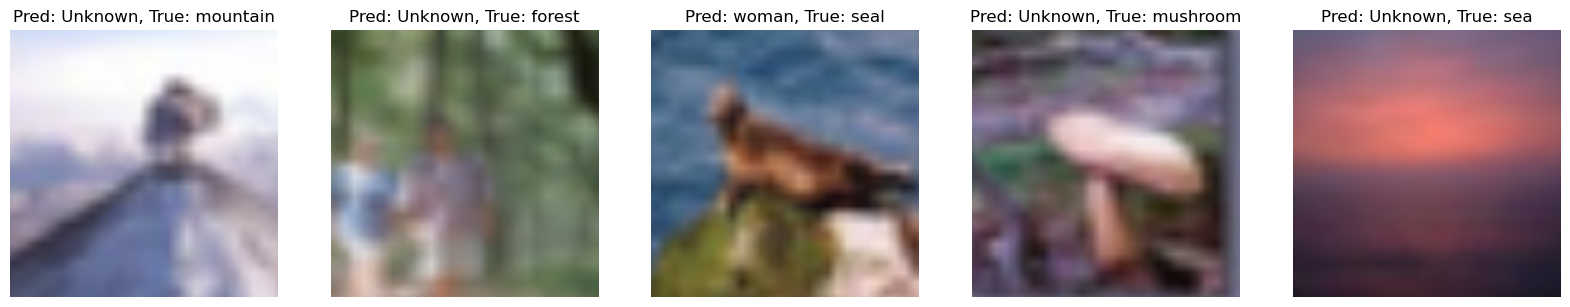

In [51]:
classes = train_dataset.classes
visualize_predictions(resnet50, test_loader, device, classes, num_images=5)

##### **Q27: How do you plot a confusion matrix for the predictions made by a pretrained model in PyTorch?**


In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

def plot_confusion_matrix(model, data_loader, device, classes, selected_classes=None):
    all_preds = []
    all_labels = []

    model.eval()
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())  # Collect all predictions and true labels

    if selected_classes is not None:  # If selected_classes is provided, filter the predictions and labels
        selected_indices = [i for i, class_name in enumerate(classes) if class_name in selected_classes]
        
        if not selected_indices:  # Handle case where no selected classes match
            raise ValueError(f"Selected classes {selected_classes} do not match any known classes.")
        
        all_preds = [pred for pred, true in zip(all_preds, all_labels) if true in selected_indices]
        all_labels = [true for true in all_labels if true in selected_indices]
        filtered_classes = [classes[i] for i in selected_indices]  # Filter predictions and labels based on selected indices
        
        if not all_preds or not all_labels:  # Ensure that there are valid labels and predictions for selected classes
            raise ValueError(f"No valid predictions or labels found for the selected classes: {selected_classes}")
    else:
        filtered_classes = classes

    cm = confusion_matrix(all_labels, all_preds, labels=selected_indices if selected_classes else None)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=filtered_classes, yticklabels=filtered_classes, cmap="Blues")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

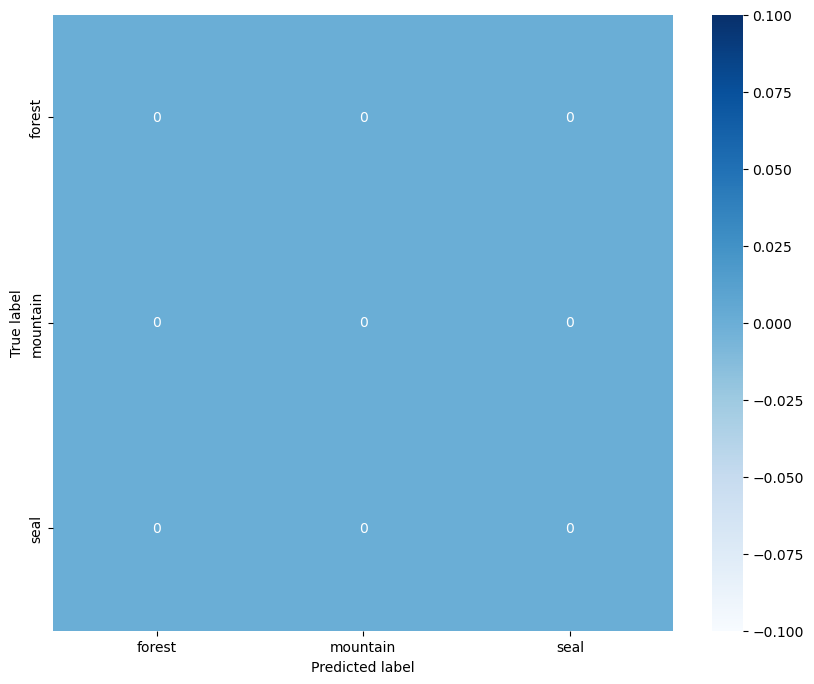

In [62]:
selected_classes = ['forest', 'mountain', 'seal']
plot_confusion_matrix(resnet50, test_loader, device, classes, selected_classes=selected_classes)

##### **Q28: How do you visualize the activation maps of specific layers in a pretrained model using techniques like Grad-CAM in PyTorch?**


In [63]:
import cv2


gradients = []
activations = []

# Hook for getting gradients and activations
def get_gradients_hook(module, grad_input, grad_output):
    gradients.append(grad_output[0])

def get_activations_hook(module, input, output):
    activations.append(output)

In [64]:
# Grad-CAM for a specific layer:
def grad_cam(model, input_image, target_class, target_layer):
    model.eval()

    gradients.clear()
    activations.clear()  # Clear previous hooks and data

    target_layer.register_forward_hook(get_activations_hook)
    target_layer.register_backward_hook(get_gradients_hook)  # Register hooks on the target layer

    output = model(input_image)
    model.zero_grad()

    output[0, target_class].backward()

    gradients_val = gradients[0].cpu().data.numpy()
    activations_val = activations[0].cpu().data.numpy()  # Get the gradients and activation maps

    weights = np.mean(gradients_val, axis=(2, 3))  # Compute weights from gradients
    
    cam = np.zeros(activations_val.shape[2:], dtype=np.float32)
    for i, w in enumerate(weights[0]):
        cam += w * activations_val[0, i, :, :]  # Compute Grad-CAM

    cam = np.maximum(cam, 0)
    cam = cam / np.max(cam)
    cam = cv2.resize(cam, (224, 224))  # Normalize the Grad-CAM map
    return cam

In [65]:
# Use Grad-CAM on an input image:
input_image = single_image.unsqueeze(0).to(device)  # Add batch dimension
target_class = 0  # Example target class index
target_layer = resnet50.layer4  # Target layer to analyze in ResNet50

cam = grad_cam(resnet50, input_image, target_class, target_layer)

/home/fellmir/anaconda3/lib/python3.12/site-packages/torch/nn/modules/module.py:1640: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


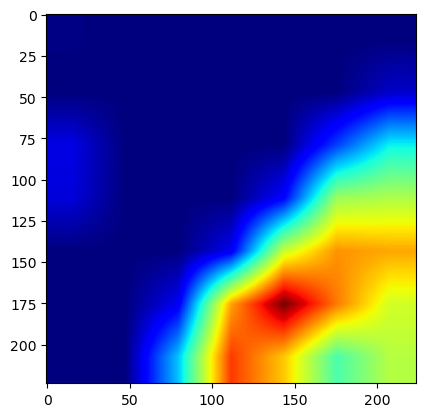

In [66]:
plt.imshow(cam, cmap='jet')
plt.show()  # Visualize Grad-CAM

##### **Q29: How do you generate and visualize t-SNE plots for the features extracted by a pretrained model in PyTorch?**


In [76]:
from sklearn.manifold import TSNE

def plot_tsne(model, data_loader, device, batch_size=32):
    features = []
    labels = []

    model = model.to(device)
    model.eval()

    # Process the data in smaller batches:
    with torch.no_grad():
        for inputs, label in data_loader:
            inputs = inputs.to(device)

            outputs = model.avgpool(model.layer4(model.layer3(model.layer2(model.layer1(model.maxpool(model.relu(model.bn1(model.conv1(inputs)))))))))  # Extract features before the fully connected layer (bottleneck features)
            outputs = outputs.view(outputs.size(0), -1)  # Flatten for t-SNE

            features.append(outputs.cpu())  
            labels.append(label.cpu())  # Move features and labels to CPU for t-SNE (t-SNE expects CPU tensors)

    features = torch.cat(features, dim=0).numpy()  # Stack all batches into one array
    labels = torch.cat(labels, dim=0).numpy()

    tsne = TSNE(n_components=2)
    tsne_features = tsne.fit_transform(features)  # Perform t-SNE

    plt.figure(figsize=(10, 8))
    plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=labels, cmap='viridis', s=10)
    plt.colorbar()
    plt.show()

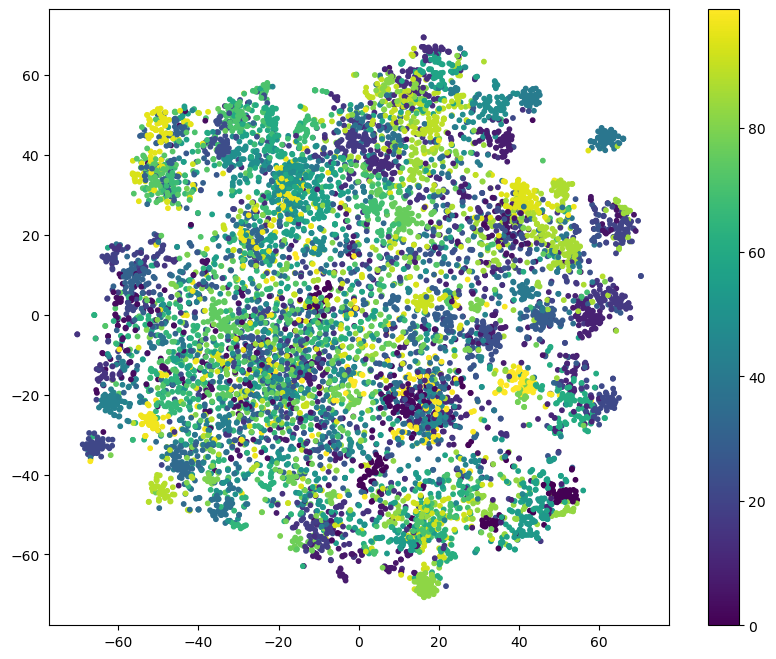

In [77]:
device_cpu = torch.device("cpu")
plot_tsne(resnet50, test_loader, device_cpu, batch_size=4)

##### **Q30: How do you overlay the Grad-CAM activation map onto the original input image to interpret the model's focus areas?**

In [78]:
def overlay_gradcam(cam, img):
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam_img = heatmap + np.float32(img)
    cam_img = cam_img / np.max(cam_img)
    return np.uint8(255 * cam_img)

In [79]:
img = input_image.squeeze(0).cpu().numpy().transpose(1, 2, 0)
img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # Un-normalize

cam_img = overlay_gradcam(cam, img)  # Overlay Grad-CAM

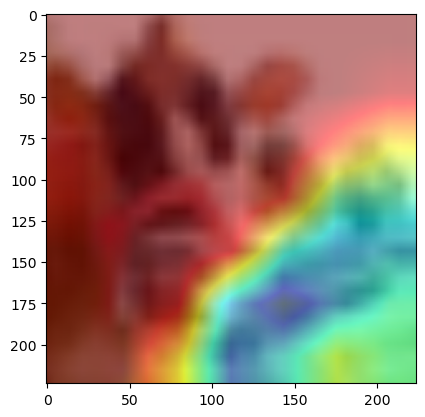

In [80]:
plt.imshow(cam_img)
plt.show()

In [81]:
import shutil
import os

if os.path.exists('data'):
    shutil.rmtree('data')
    print("Folder 'data' has been deleted.")
else:
    print("Folder 'data' does not exist.")

Folder 'data' has been deleted.
